In [1]:
"""Pavan's Version of the SGOOP tutorial with elimination of noisy parameters and then self-consistency check"""
import sgoop
import scipy.optimize as opt
import numpy as np
import time
import matplotlib as plt

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
def opti_func(rc):
    global nfev
    nfev +=1
    return -sgoop.rc_eval(rc)

In [3]:
def print_fun(x, f, accepted):
    global now,last,nfev,lastf
    now=time.time()
    print(x,end=' ')
    if accepted == 1:
        print("with spectral gap %.4f accepted after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    else:
        print("with spectral gap %.4f declined after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    last=now
    lastf=nfev

In [4]:
def find_wells(prob):
    
    energy = []
    for i in (range(len(prob))):
        if prob[i] == 0:
            energy.append(np.inf)
        else:
            energy.append(-1 * np.log(prob[i]))
    
    wells = 0
    max = np.inf
    min = np.inf
    d = 1
    i = 0
    for x in energy:
        if x > max:
            max = x
            if (max - min > 1):
                min = x
                d = 1
        elif x < min:
            min = x
            if (max - min > 1):
                if d == 1:
                    wells = wells + 1
                max = x
                d = -1
        i = i + 1
    
    return wells

In [5]:
def initial_guess(wells):
    
    x = [-1, -1, -1, -1, -1, -1, -1, -1]
    rc = x
    max_val = 0
    sgoop.wells = wells
    
    while not x == [1, 1, 1, 1, 1, 1, 1, 1]:
        
        tmp = sgoop.rc_eval(x)
        if tmp > max_val:
            max_val = tmp
            rc = x.copy()
            
        for i in range(8):
            if x[7 - i] == -1:
                x[7 - i] = 1
                break;
            else:
                x[7 - i] = -1
                
    tmp = sgoop.rc_eval(x)
    if tmp > max_val:
        max_val = tmp
        rc = x.copy()
        
    return rc

In [6]:
# Calculating the optimal 2 well RC.
consistent = True
candidate_wells = 1

while (consistent == True):
    
    print("Testing " + str(candidate_wells) + " wells")
    
    guess = initial_guess(candidate_wells)
    
    sgoop.wells = candidate_wells
    start = time.time()
    last = start
    lastf = nfev = 0
    minimizer_kwargs = {"options": {"maxiter":10}}
    ret = opt.basinhopping(opti_func,guess,niter=100,T=.01,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
    end = time.time()
    print(end-start)
    prob_space = sgoop.md_prob(ret.x)
    
    if (find_wells(prob_space) >= candidate_wells):
        print(str(candidate_wells) + " well runs accepted. Testing " + str(candidate_wells + 1) + " well RC.")
        rc = ret.x.copy()
        candidate_wells = candidate_wells + 1
    else:
        print(str(candidate_wells) + " well runs failed. Reverting to previous RC.")
        consistent = False
        
    print()

rc



Testing 1 wells
[ 0.934  0.915  1.004  1.095  1.052  1.037 -0.969 -0.913] with spectral gap 0.0254 accepted after  20 runs (0.034)
[ 0.931  0.829  0.923  1.096  1.041  1.076 -0.950 -0.991] with spectral gap 0.0238 accepted after  10 runs (0.011)
[ 0.963  0.796  0.854  1.046  1.028  0.986 -0.888 -0.933] with spectral gap 0.0250 accepted after  10 runs (0.011)
[ 1.059  0.704  0.872  1.026  1.125  0.959 -0.937 -0.932] with spectral gap 0.0270 accepted after  10 runs (0.010)
[ 1.112  0.782  0.856  1.098  1.154  0.883 -1.009 -0.838] with spectral gap 0.0277 accepted after  10 runs (0.012)
[ 1.118  0.751  0.828  1.063  1.127  0.837 -1.038 -0.781] with spectral gap 0.0283 accepted after  10 runs (0.011)
[ 1.134  0.739  0.783  1.009  1.217  0.738 -1.032 -0.715] with spectral gap 0.0271 accepted after  10 runs (0.010)
[ 1.148  0.710  0.771  0.991  1.160  0.688 -1.096 -0.618] with spectral gap 0.0267 accepted after  10 runs (0.012)
[ 1.116  0.786  0.777  1.073  1.131  0.714 -1.047 -0.540] with s

[ 1.048  0.647  0.878  1.149 -0.107  0.957 -1.025 -0.069] with spectral gap 0.0204 accepted after  10 runs (0.012)
[ 1.136  0.587  0.881  1.131 -0.114  0.945 -1.095 -0.147] with spectral gap 0.0191 accepted after  10 runs (0.017)
[ 1.111  0.664  0.894  1.141 -0.005  1.041 -1.050 -0.168] with spectral gap 0.0199 accepted after  10 runs (0.012)
[ 1.173  0.672  1.002  1.032 -0.064  1.120 -1.129 -0.262] with spectral gap 0.0158 declined after  10 runs (0.011)
[ 1.119  0.763  0.993  1.227 -0.115  0.937 -1.110 -0.191] with spectral gap 0.0212 accepted after  10 runs (0.013)
[ 1.074  0.786  0.962  1.228 -0.104  0.851 -1.026 -0.274] with spectral gap 0.0000 declined after  10 runs (0.012)
[ 1.035  0.758  1.081  1.204 -0.092  0.944 -1.218 -0.221] with spectral gap 0.0208 accepted after  10 runs (0.020)
[ 1.024  0.722  1.091  1.169 -0.069  0.944 -1.241 -0.187] with spectral gap 0.0202 accepted after  10 runs (0.014)
[ 0.914  0.672  1.176  1.234  0.005  0.855 -1.244 -0.219] with spectral gap 0.02

[-1.500 -0.533  1.201  0.749  1.551 -0.827  1.372  1.219] with spectral gap 0.0567 accepted after  10 runs (0.014)
[-1.566 -0.638  1.196  0.778  1.452 -0.863  1.331  1.197] with spectral gap 0.0563 accepted after  10 runs (0.010)
[-1.530 -0.668  1.108  0.684  1.376 -0.763  1.427  1.246] with spectral gap 0.0573 accepted after  10 runs (0.011)
[-1.638 -0.676  1.093  0.587  1.332 -0.738  1.445  1.191] with spectral gap 0.0543 accepted after  10 runs (0.011)
[-1.527 -0.785  1.106  0.536  1.327 -0.786  1.522  1.284] with spectral gap 0.0544 accepted after  10 runs (0.010)
[-1.582 -0.684  1.070  0.440  1.217 -0.864  1.472  1.249] with spectral gap 0.0544 accepted after  10 runs (0.013)
[-1.598 -0.579  1.015  0.444  1.207 -0.795  1.383  1.145] with spectral gap 0.0567 accepted after  10 runs (0.011)
[-1.652 -0.597  1.054  0.429  1.219 -0.738  1.363  1.186] with spectral gap 0.0557 accepted after  10 runs (0.011)
[-1.671 -0.619  1.091  0.527  1.243 -0.837  1.277  1.136] with spectral gap 0.05

array([ 1.118,  0.751,  0.828,  1.063,  1.127,  0.837, -1.038, -0.781])

[ 0.973  0.862  0.903  0.951  0.974  0.846 -1.000 -0.946]
3.9802242349676233
5.263554029602221


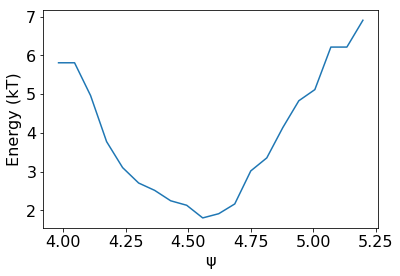

In [14]:
# Graphing the optimal RC with the most wells
rc = np.array([-1.052, -0.932, -0.976, -1.028, -1.053, -0.915, 1.081, 1.023])
rc = -1 * rc / 1.081
p=sgoop.md_prob(rc)
proj=np.dot(sgoop.data_array,rc)
min_rc = np.min(proj)
max_rc = np.max(proj)
print(rc)
print(min_rc)
print(max_rc)
diff = (max_rc - min_rc) / 20
xs = [min_rc + i * diff for i in range(20)]
plt.rcParams.update({'font.size': 16})
plt.pyplot.xlabel("\u03C8")
plt.pyplot.ylabel("Energy (kT)")
plt.pyplot.plot(xs, -np.ma.log(p))
plt.pyplot.show()
#print(str(candidate_wells - 1) + " well(s)")